In [33]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.cluster import KMeans
%matplotlib inline

In [34]:
with open("example1.dat") as f:
    content = f.readlines()
    edges = [tuple([int(y) for y in x.strip().split(",")]) for x in content]

vertexes = set()
for v in edges:
    for vx in v:
        vertexes.add(vx)
print(len(vertexes))

241


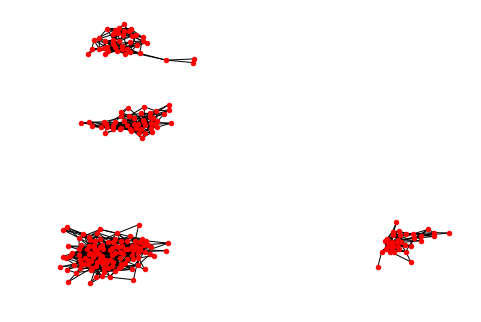

In [35]:
G = nx.Graph()
G.add_nodes_from(vertexes)
G.add_edges_from(edges)
nx.draw(G, node_size=20)
plt.show()

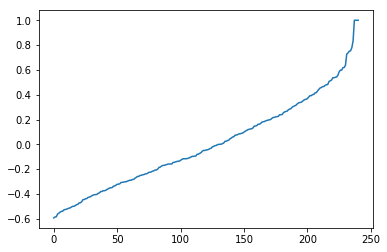

In [36]:
A = np.asarray(nx.adjacency_matrix(G).todense())
D=np.diag(np.sum(A, axis=1))

D_inv = np.linalg.inv(np.sqrt(D))
L = np.dot(np.dot(D_inv, A), D_inv)

values, vectors = sc.linalg.eigh(L)#values in ascending order
plt.plot(values)
plt.show()


4


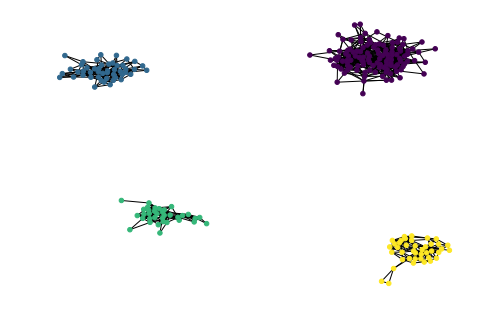

In [37]:
k=np.argmin(np.ediff1d(np.flipud(values)))+1#dropping point. number of clusters k is usually given by the value of k that maximizes the eigengap
print(k)
X = vectors[:,len(vertexes)-k:]#get last vectors (values are in ascending order)
divisor = np.reshape(np.linalg.norm(X,axis=1), (X.shape[0], 1)) #compute norm (rows, 1 col)
Y = np.divide(X, divisor)
clustering = KMeans(n_clusters=k).fit(Y)
labels = clustering.labels_
nx.draw(G, node_size=20, node_color=labels)

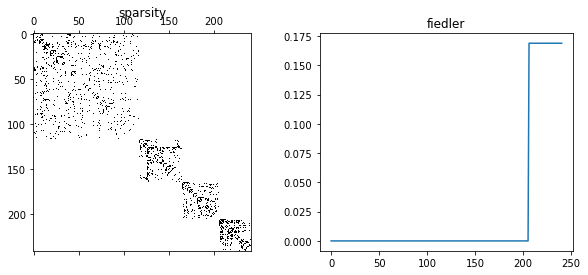

In [38]:
L = D - A
values, vectors = sc.linalg.eigh(L) 
fig=plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
plt.spy(A) 
plt.title('sparsity')
plt.subplot(1,2,2)
plt.plot(np.sort(vectors[:, 1]))# vector of second smallest eigenvalue of L
plt.title('fiedler')
plt.show()

SECOND

100


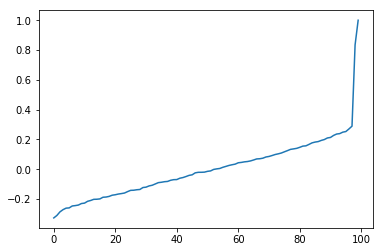

2


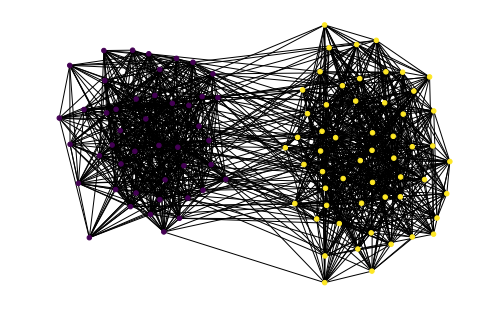

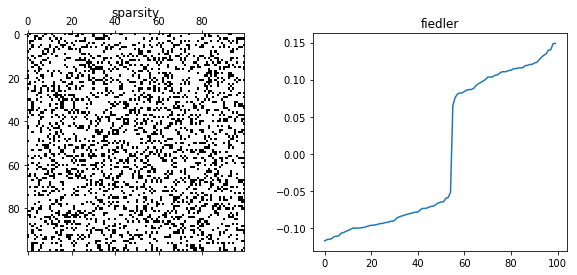

In [39]:
edges = []
with open("example2.dat") as f:
    content = f.readlines()
    edges = [tuple([int(y) for y in x.strip().split(",")]) for x in content]
edges = [tuple([edge[0], edge[1]]) for edge in edges]
vertexes = set()
for v in edges:
    for vx in v:
        vertexes.add(vx)
print(len(vertexes))
G = nx.Graph()
G.add_nodes_from(vertexes)
G.add_edges_from(edges)
A=np.zeros([len(vertexes), len(vertexes)])
for e in edges:
    A[e[0]-1, e[1]-1]=1 #generate adj matrix

D=np.diag(np.sum(A, axis=1))
D_inv = np.linalg.inv(np.sqrt(D))
L = np.dot(np.dot(D_inv, A), D_inv)

values, vectors = sc.linalg.eigh(L)#values in ascending order
plt.plot(values)
plt.show()
k=np.argmin(np.ediff1d(np.flipud(values)))+1#dropping point
print(k)
X = vectors[:,len(vertexes)-k:]#get last vectors (values are in ascending order)
divisor = np.reshape(np.linalg.norm(X,axis=1), (X.shape[0], 1)) #compute norm (rows, 1 col)
Y = np.divide(X, divisor)
clustering = KMeans(n_clusters=k).fit(Y)
labels = clustering.labels_
nx.draw(G, node_size=20, node_color=labels)
L = D - A
values, vectors = sc.linalg.eigh(L) 
# Plot the sparsity pattern and sorted fiedler vector
fig=plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
plt.spy(A) 
plt.title('sparsity')
plt.subplot(1,2,2)
plt.plot(np.sort(vectors[:, 1]))# vector of second smallest eigenvalue of L
plt.title('fiedler')
plt.show()